In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./Leads.csv')

In [8]:
df.shape

(9240, 37)

In [12]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [23]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)

In [26]:
for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [33]:
# checking for the duplicate values
df.duplicated().sum()

0

# 2. Data Cleaning

### 2.1 Dropping the unnecessary columns

Since Prospect ID and Lead Number columns are unique valued columns, so we delete them

In [45]:
df.drop(columns=['prospect_id', 'lead_number'], inplace= True)

In [55]:
#Checking value_counts() to identify other unnecessary columns

for f in df.columns:
    print(df[f].value_counts())
    print()
    print('------------------------------------------')

lead_origin
landing_page_submission    4886
api                        3580
lead_add_form               718
lead_import                  55
quick_add_form                1
Name: count, dtype: int64

------------------------------------------
lead_source
google               2873
direct_traffic       2543
olark_chat           1755
organic_search       1154
reference             534
welingak_website      142
referral_sites        125
facebook               55
bing                    6
click2call              4
social_media            2
live_chat               2
press_release           2
pay_per_click_ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: count, dtype: int64

------------------------------------------
do_not_email
no     8506
yes     734
Name: count, dtype: int64

------------------------------------------
do_not_call
no     9238
yes       2
Name: count, 

Some columns have only one type of value like no or have little to no variety in their values. Such columns are not useful in prediction and hence can be removed.

In [57]:
# Removing single valued variables
df.drop(columns = ['magazine','receive_more_updates_about_our_courses', 'update_me_on_supply_chain_content','get_updates_on_dm_content'
        , 'i_agree_to_pay_the_amount_through_cheque'], inplace=True)

In [60]:
# Removing variables with less variety
df.drop(columns=['do_not_call', 'what_matters_most_to_you_in_choosing_a_course', 'search','newspaper_article',
                'x_education_forums', 'newspaper', 'digital_advertisement','through_recommendations'], inplace=True)

In [62]:
# Removing feature related to geographic data
df.drop(columns=['country','city'], inplace = True)

In [69]:
df.isnull().sum().sort_values(ascending= False)

lead_quality                              4767
asymmetrique_profile_index                4218
asymmetrique_profile_score                4218
asymmetrique_activity_score               4218
asymmetrique_activity_index               4218
tags                                      3353
lead_profile                              2709
what_is_your_current_occupation           2690
how_did_you_hear_about_x_education        2207
specialization                            1438
totalvisits                                137
page_views_per_visit                       137
last_activity                              103
lead_source                                 36
a_free_copy_of_mastering_the_interview       0
lead_origin                                  0
total_time_spent_on_website                  0
converted                                    0
do_not_email                                 0
last_notable_activity                        0
dtype: int64

### 2.2 Missing Value Analysis

In [71]:
# Checking which columns have null values
df.isnull().sum().sort_values(ascending = False)

lead_quality                              4767
asymmetrique_profile_index                4218
asymmetrique_profile_score                4218
asymmetrique_activity_score               4218
asymmetrique_activity_index               4218
tags                                      3353
lead_profile                              2709
what_is_your_current_occupation           2690
how_did_you_hear_about_x_education        2207
specialization                            1438
totalvisits                                137
page_views_per_visit                       137
last_activity                              103
lead_source                                 36
a_free_copy_of_mastering_the_interview       0
lead_origin                                  0
total_time_spent_on_website                  0
converted                                    0
do_not_email                                 0
last_notable_activity                        0
dtype: int64

In [72]:
# Calculating the number of null values as a percentage of its sum
round(((df.isnull().sum()/len(df))*100).sort_values(ascending = False),3)

lead_quality                              51.591
asymmetrique_profile_index                45.649
asymmetrique_profile_score                45.649
asymmetrique_activity_score               45.649
asymmetrique_activity_index               45.649
tags                                      36.288
lead_profile                              29.318
what_is_your_current_occupation           29.113
how_did_you_hear_about_x_education        23.885
specialization                            15.563
totalvisits                                1.483
page_views_per_visit                       1.483
last_activity                              1.115
lead_source                                0.390
a_free_copy_of_mastering_the_interview     0.000
lead_origin                                0.000
total_time_spent_on_website                0.000
converted                                  0.000
do_not_email                               0.000
last_notable_activity                      0.000
dtype: float64

In [73]:
# Calculating the ratio of the null column
null_col = df.isnull().sum()/ len(df)

In [77]:
# Finding the columns which has more than 30% null values
null_col_list = null_col[null_col.values >= 0.3].index.tolist()

In [79]:
len(null_col_list)

6

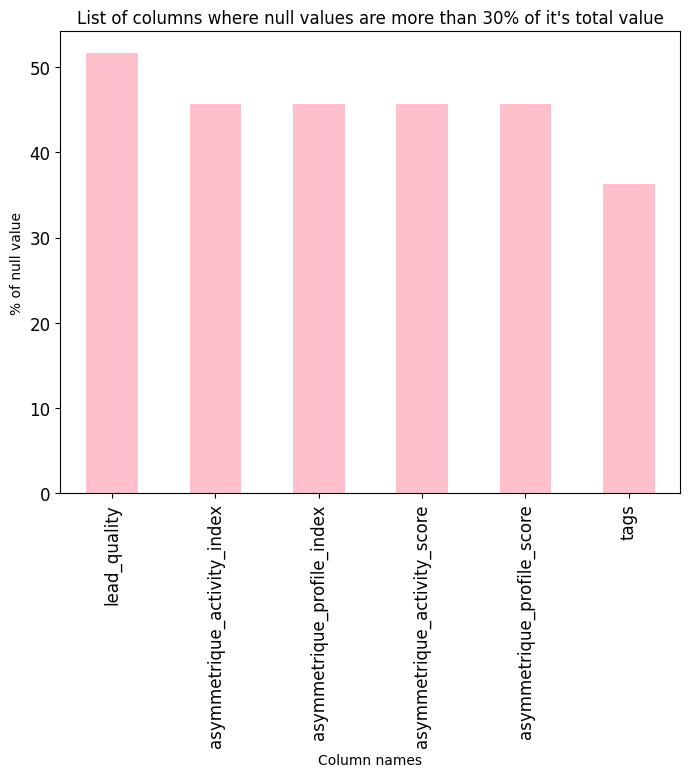

In [87]:
#plotting the columns having >30% null values
plt.figure(figsize = [8,6])
((null_col[null_col.values >0.3]) * 100).sort_values(ascending = False).plot.bar(color = 'pink')
plt.title('List of columns where null values are more than 30% of it\'s total value')
plt.xlabel('Column names')
plt.ylabel('% of null value')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

#### 2.2.1 Removing the above columns

In [89]:
df.drop(labels = null_col_list, axis =1 , inplace= True)

In [99]:
round(((df.isnull().sum()/len(df))*100).sort_values(ascending = False),3)

lead_profile                              29.318
what_is_your_current_occupation           29.113
how_did_you_hear_about_x_education        23.885
specialization                            15.563
totalvisits                                1.483
page_views_per_visit                       1.483
last_activity                              1.115
lead_source                                0.390
lead_origin                                0.000
do_not_email                               0.000
converted                                  0.000
total_time_spent_on_website                0.000
a_free_copy_of_mastering_the_interview     0.000
last_notable_activity                      0.000
dtype: float64